<a href="https://colab.research.google.com/github/JHORIZ-RODEL-AQUINO/PROJECTS/blob/main/DATA_PLOTTING_AND_ANALYZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
url = '/Satisfaction Levels.csv'
col_name = ['AGE','SEX','SECTION','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11', 'Q12', 'AVE RESPONSE']
dataset = pd.read_csv(url, names = col_name)

In [ ]:
dataset.shape

(41, 16)

In [ ]:
dataset.head(41)

,AGE,SEX,SECTION,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AVE RESPONSE
0,19,M,Section 1,4,5,4,4,4,3,2,3,4,3,2,3,3.42
1,19,M,Section 1,4,4,3,4,4,3,3,4,4,3,3,4,3.58
2,20,M,Section 1,4,5,4,4,4,5,4,5,4,5,4,5,4.42
3,19,M,Section 1,3,4,3,4,4,5,2,4,4,5,2,4,3.67
4,18,M,Section 1,3,4,4,4,4,4,2,3,4,4,2,3,3.42
5,19,M,Section 1,4,5,3,4,3,3,2,4,3,3,2,4,3.33
6,19,M,Section 1,5,5,3,4,3,4,3,4,3,4,3,4,3.75
7,20,M,Section 2,4,4,4,4,4,4,4,4,4,4,4,4,4.00
8,20,M,Section 2,4,4,3,5,5,3,5,5,5,3,5,5,4.33
9,20,M,Section 2,4,3,2,3,4,3,2,4,4,3,2,4,3.17


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           41 non-null     int64  
 1   SEX           41 non-null     object 
 2   SECTION       41 non-null     object 
 3   Q1            41 non-null     int64  
 4   Q2            41 non-null     int64  
 5   Q3            41 non-null     int64  
 6   Q4            41 non-null     int64  
 7   Q5            41 non-null     int64  
 8   Q6            41 non-null     int64  
 9   Q7            41 non-null     int64  
 10  Q8            41 non-null     int64  
 11  Q9            41 non-null     int64  
 12  Q10           41 non-null     int64  
 13  Q11           41 non-null     int64  
 14  Q12           41 non-null     int64  
 15  AVE RESPONSE  41 non-null     float64
dtypes: float64(1), int64(13), object(2)
memory usage: 5.2+ KB


In [ ]:
dataset.describe()

,AGE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,AVE RESPONSE
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,19.219512,3.902439,3.878049,3.317073,3.682927,3.682927,3.585366,3.170732,4.024390,3.756098,3.634146,3.341463,3.439024,3.618049
std,0.689645,0.860374,0.899864,0.849677,0.878608,0.933783,0.835931,1.070104,0.651452,0.767479,0.829340,0.911311,1.001219,0.552056
min,18.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.420000
25%,19.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.330000
50%,19.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.580000
75%,20.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dataset['AGE'].value_counts()

19    23
20    12
18     5
21     1
Name: AGE, dtype: int64

In [ ]:
dataset['SEX'].value_counts()

M    27
F    14
Name: SEX, dtype: int64

In [ ]:
dataset['SECTION'].value_counts()

Section 2    21
Section 1    20
Name: SECTION, dtype: int64

In [ ]:
for i in range(1,13):
  print(dataset[f'Q{i}'].value_counts(), '\n')

4    22
5     9
3     8
1     1
2     1
Name: Q1, dtype: int64 

4    20
5    10
3     7
2     4
Name: Q2, dtype: int64 

4    17
3    14
2     8
5     2
Name: Q3, dtype: int64 

4    26
3     6
5     4
2     4
1     1
Name: Q4, dtype: int64 

4    19
3    11
5     7
2     3
1     1
Name: Q5, dtype: int64 

4    18
3    14
5     5
2     4
Name: Q6, dtype: int64 

4    15
3    12
2     8
5     3
1     3
Name: Q7, dtype: int64 

4    24
5     9
3     8
Name: Q8, dtype: int64 

4    24
3     9
5     5
2     3
Name: Q9, dtype: int64 

3    18
4    14
5     7
2     2
Name: Q10, dtype: int64 

3    15
4    14
2     8
5     4
Name: Q11, dtype: int64 

4    20
3     8
2     8
5     4
1     1
Name: Q12, dtype: int64 




Average Reponse by Age


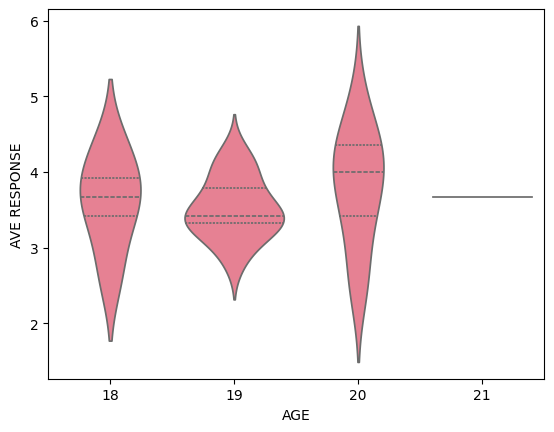


Average Reponse by Sex


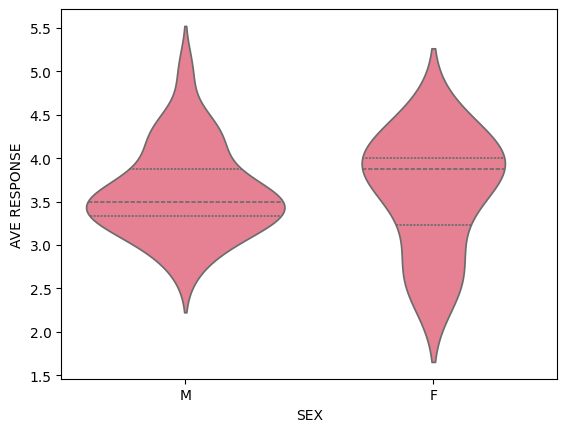


Average Reponse by Section


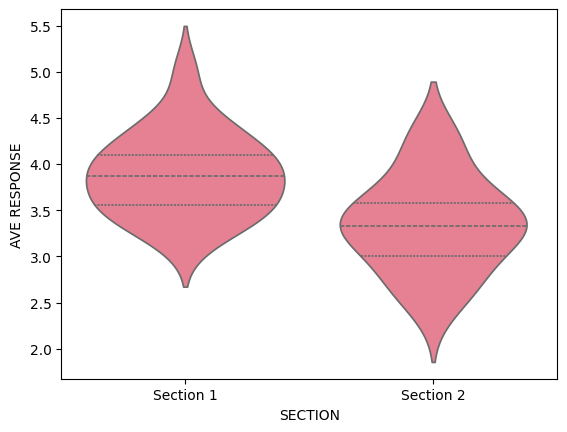

In [ ]:
  print("\nAverage Reponse by Age")
  sns.violinplot(x='AGE', y='AVE RESPONSE', data=dataset, inner='quartile')
  plt.show()

  print("\nAverage Reponse by Sex")
  sns.violinplot(x='SEX', y='AVE RESPONSE', data=dataset, inner='quartile')
  plt.show()

  print("\nAverage Reponse by Section")
  sns.violinplot(x='SECTION', y='AVE RESPONSE', data=dataset, inner='quartile')
  plt.show()



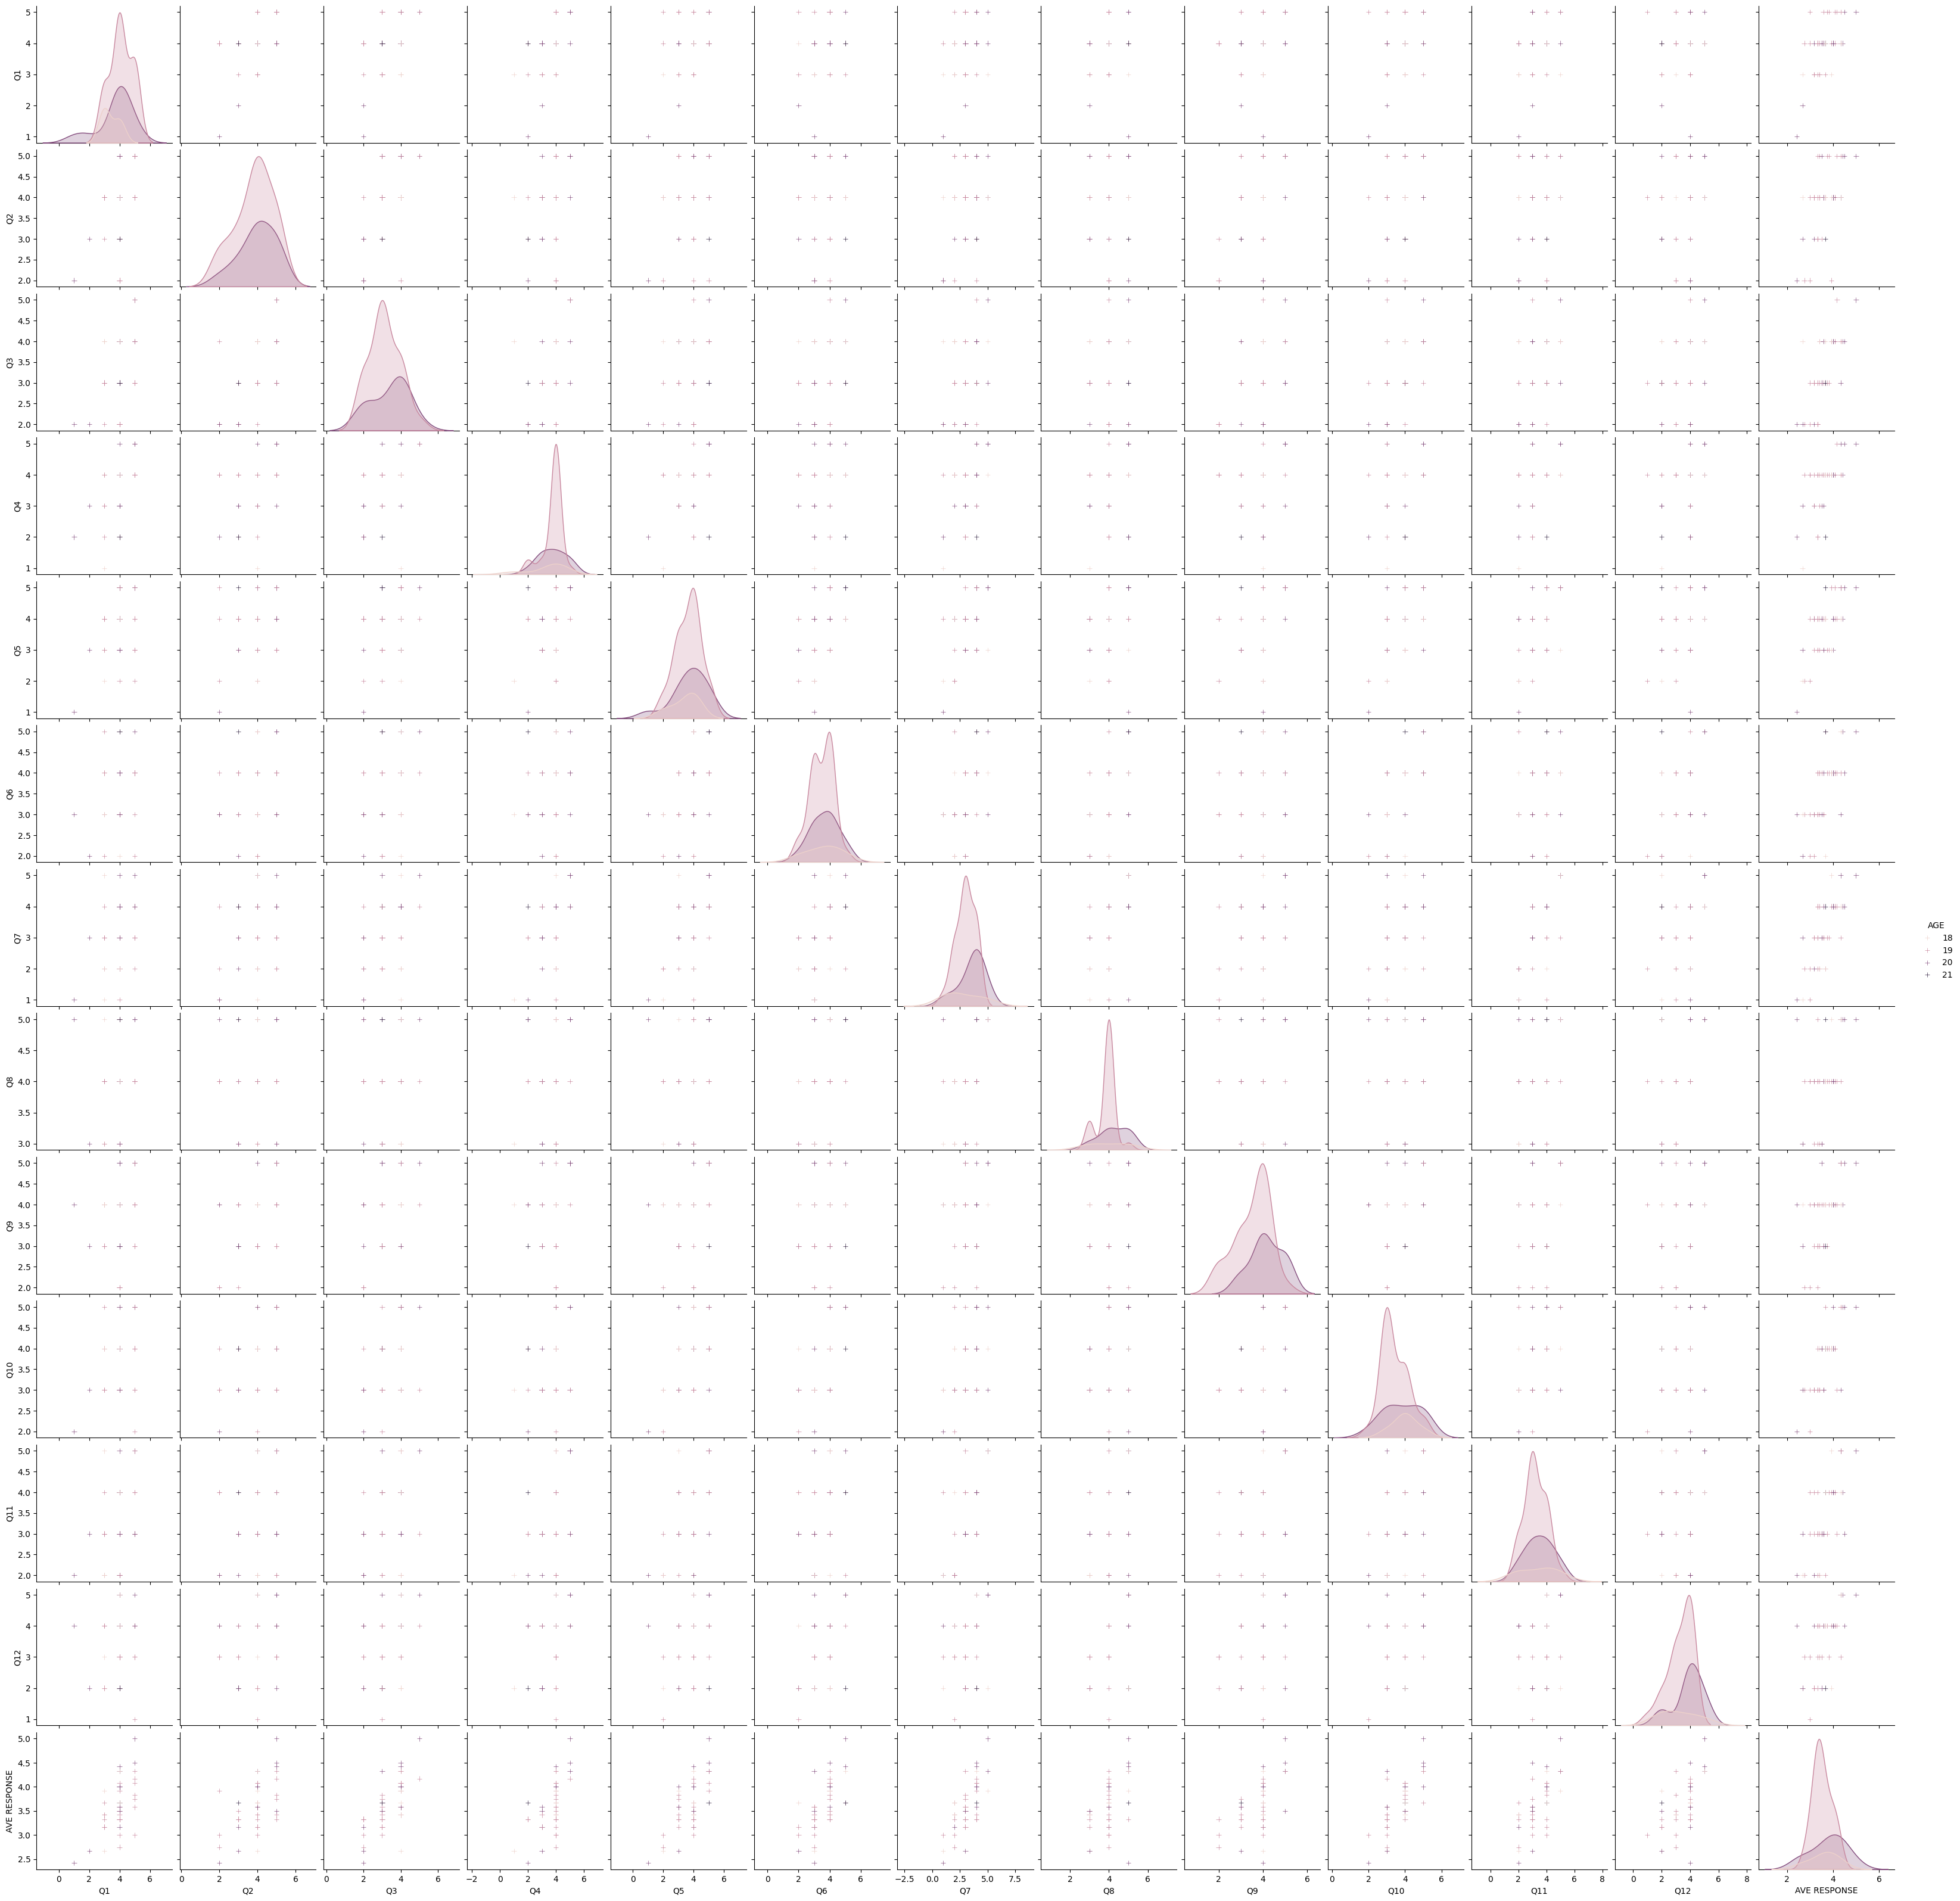

In [ ]:
sns.pairplot(dataset, hue='AGE', markers='+')
plt.show()

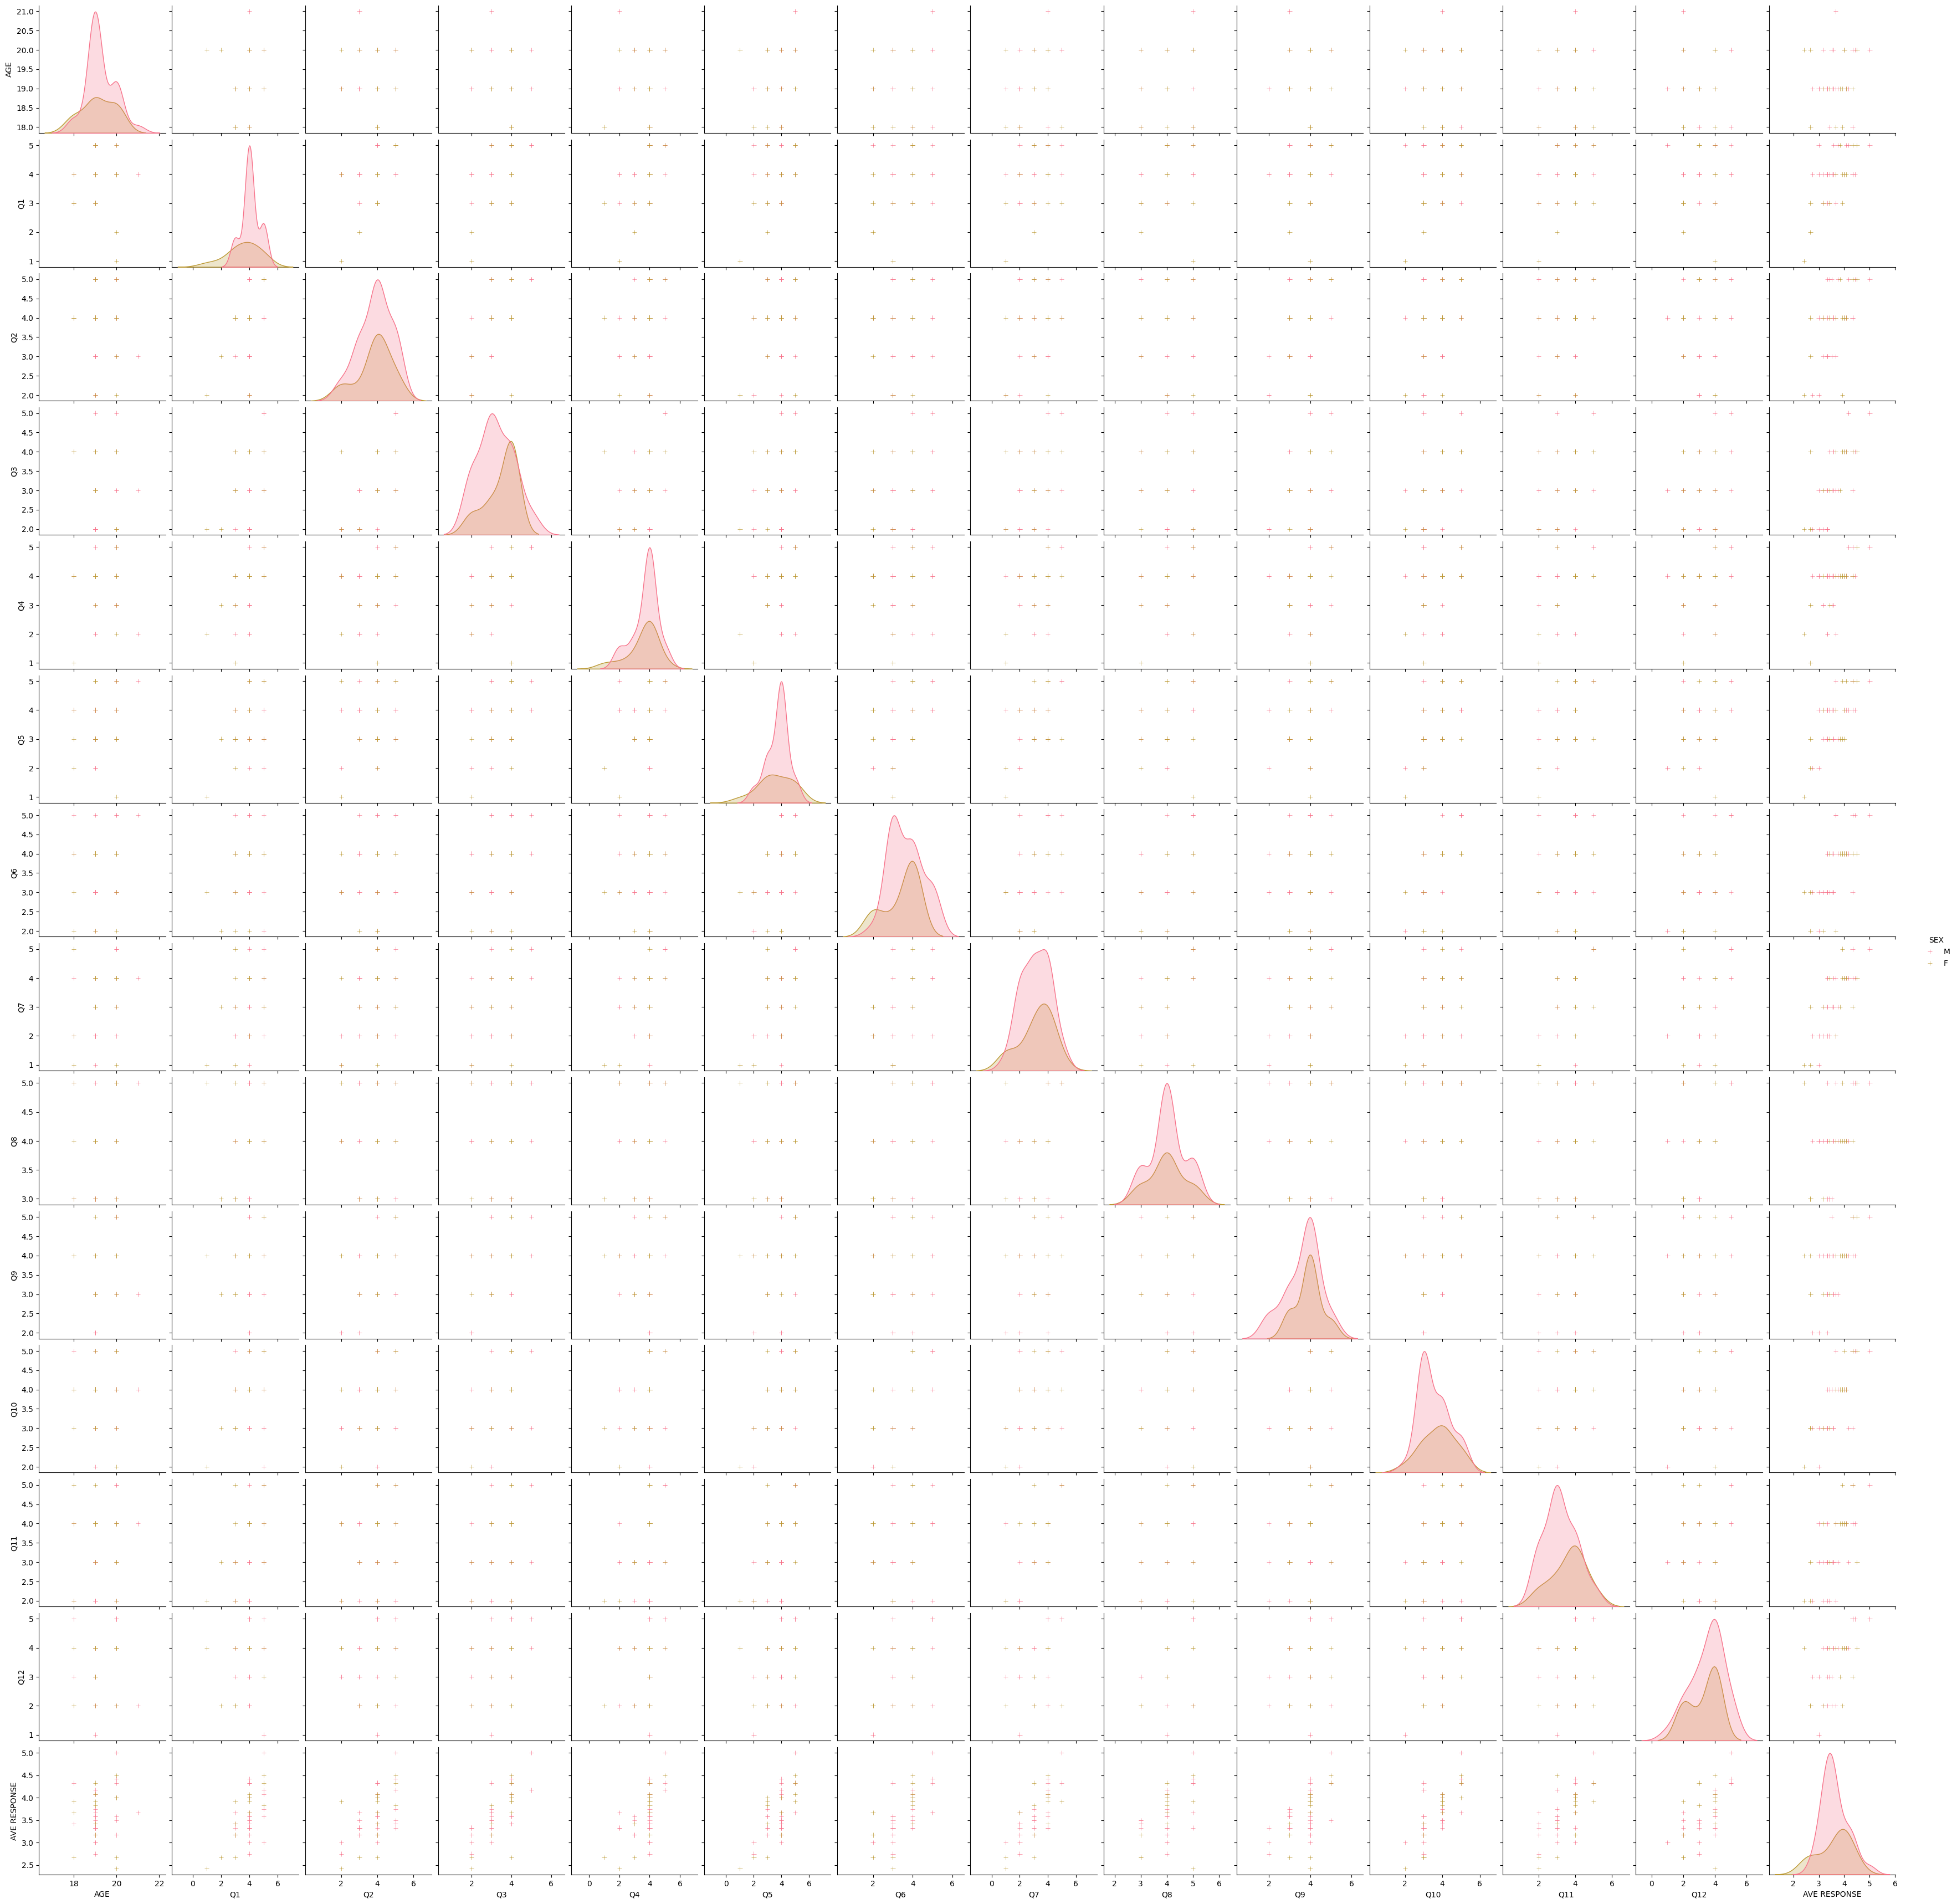

In [ ]:
sns.pairplot(dataset, hue='SEX', markers='+')
plt.show()

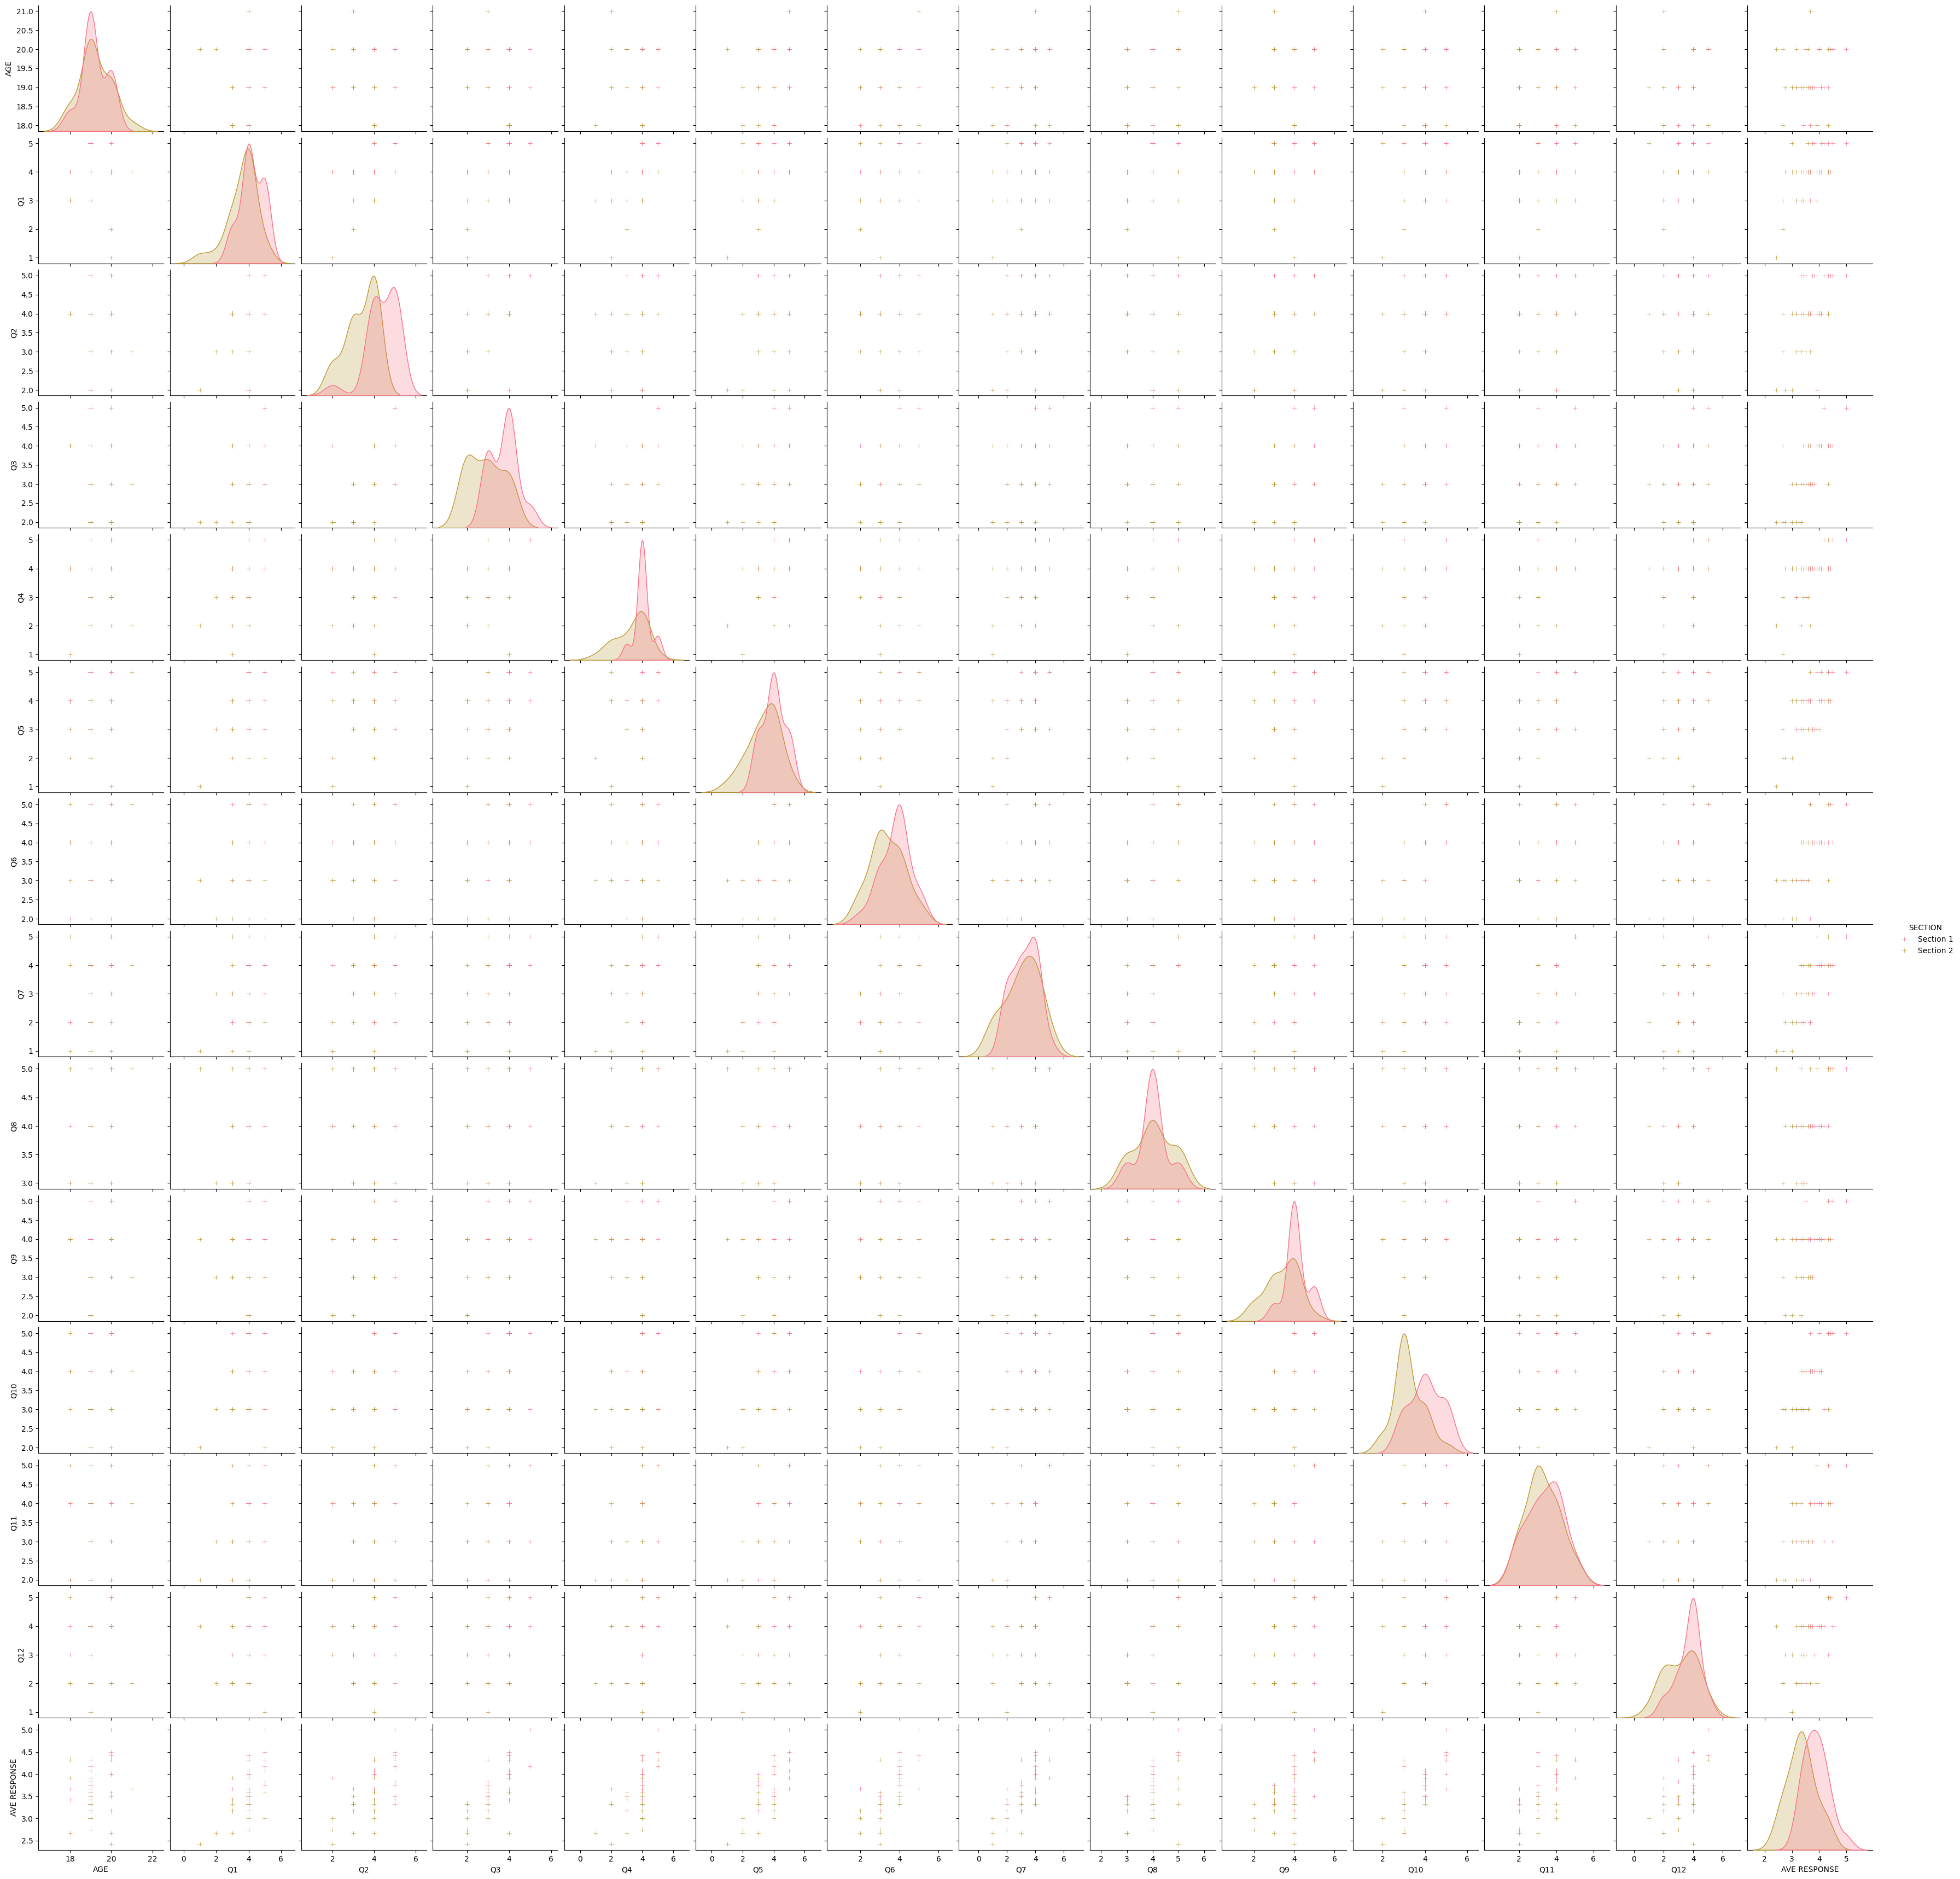

In [ ]:
sns.pairplot(dataset, hue='SECTION', markers='+')
plt.show()

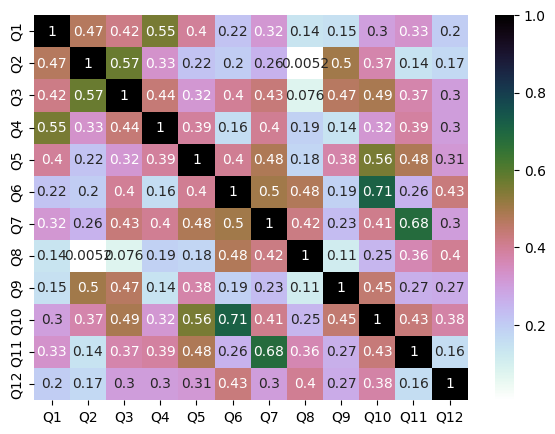

In [ ]:
Q_columns = dataset.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14]]

plt.figure(figsize=(7,5))
sns.heatmap(Q_columns.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [ ]:
X = dataset.drop(['AVE RESPONSE'], axis=1)
y = dataset['AVE RESPONSE']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (41, 15) | y shape: (41,) 
